In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import numpy as np
import sklearn.cross_validation as cross_validation
import sklearn.ensemble as ensemble
import sklearn.grid_search as grid_search
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
import pickle
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

# Import and Combine Data

In [26]:
data1 = pd.read_csv('C:/Users/Mathew/Data Science Project/data/pums/ss13pusa.csv')

In [27]:
data2 = pd.read_csv('C:/Users/Mathew/Data Science Project/data/pums/ss13pusb.csv')

In [28]:
data = [data1, data2]
data = pd.concat(data)
print(data.shape)
del data1
del data2

(3132795, 283)


# Remove Non-Informational Features

In [29]:
data.columns.values

array(['RT', 'SERIALNO', 'SPORDER', 'PUMA', 'ST', 'ADJINC', 'PWGTP',
       'AGEP', 'CIT', 'CITWP', 'COW', 'DDRS', 'DEAR', 'DEYE', 'DOUT',
       'DPHY', 'DRAT', 'DRATX', 'DREM', 'ENG', 'FER', 'GCL', 'GCM', 'GCR',
       'HINS1', 'HINS2', 'HINS3', 'HINS4', 'HINS5', 'HINS6', 'HINS7',
       'INTP', 'JWMNP', 'JWRIP', 'JWTR', 'LANX', 'MAR', 'MARHD', 'MARHM',
       'MARHT', 'MARHW', 'MARHYP', 'MIG', 'MIL', 'MLPA', 'MLPB', 'MLPCD',
       'MLPE', 'MLPFG', 'MLPH', 'MLPI', 'MLPJ', 'MLPK', 'NWAB', 'NWAV',
       'NWLA', 'NWLK', 'NWRE', 'OIP', 'PAP', 'RELP', 'RETP', 'SCH', 'SCHG',
       'SCHL', 'SEMP', 'SEX', 'SSIP', 'SSP', 'WAGP', 'WKHP', 'WKL', 'WKW',
       'WRK', 'YOEP', 'ANC', 'ANC1P', 'ANC2P', 'DECADE', 'DIS', 'DRIVESP',
       'ESP', 'ESR', 'FOD1P', 'FOD2P', 'HICOV', 'HISP', 'INDP', 'JWAP',
       'JWDP', 'LANP', 'MIGPUMA', 'MIGSP', 'MSP', 'NAICSP', 'NATIVITY',
       'NOP', 'OC', 'OCCP', 'PAOC', 'PERNP', 'PINCP', 'POBP', 'POVPIP',
       'POWPUMA', 'POWSP', 'PRIVCOV', 'PUBCOV', 'QTRBI

In [30]:
data = data.drop(['RT', 'SERIALNO', 'SPORDER', 'ADJINC', 'NAICSP', 
       'OCCP', 'SOCP', 'FAGEP', 'FANCP', 'FCITP', 'FCITWP', 'FCOWP',
       'FDDRSP', 'FDEARP', 'FDEYEP', 'FDISP', 'FDOUTP', 'FDPHYP', 'FDRATP',
       'FDRATXP', 'FDREMP', 'FENGP', 'FESRP', 'FFERP', 'FFODP', 'FGCLP',
       'FGCMP', 'FGCRP', 'FHINS1P', 'FHINS2P', 'FHINS3C', 'FHINS3P',
       'FHINS4C', 'FHINS4P', 'FHINS5C', 'FHINS5P', 'FHINS6P', 'FHINS7P',
       'FHISP', 'FINDP', 'FINTP', 'FJWDP', 'FJWMNP', 'FJWRIP', 'FJWTRP',
       'FLANP', 'FLANXP', 'FMARHDP', 'FMARHMP', 'FMARHTP', 'FMARHWP',
       'FMARHYP', 'FMARP', 'FMIGP', 'FMIGSP', 'FMILPP', 'FMILSP', 'FOCCP',
       'FOIP', 'FPAP', 'FPERNP', 'FPINCP', 'FPOBP', 'FPOWSP', 'FPRIVCOVP',
       'FPUBCOVP', 'FRACP', 'FRELP', 'FRETP', 'FSCHGP', 'FSCHLP', 'FSCHP',
       'FSEMP', 'FSEXP', 'FSSIP', 'FSSP', 'FWAGP', 'FWKHP', 'FWKLP',
       'FWKWP', 'FWRKP', 'FYOEP', 'pwgtp1', 'pwgtp2', 'pwgtp3', 'pwgtp4',
       'pwgtp5', 'pwgtp6', 'pwgtp7', 'pwgtp8', 'pwgtp9', 'pwgtp10',
       'pwgtp11', 'pwgtp12', 'pwgtp13', 'pwgtp14', 'pwgtp15', 'pwgtp16',
       'pwgtp17', 'pwgtp18', 'pwgtp19', 'pwgtp20', 'pwgtp21', 'pwgtp22',
       'pwgtp23', 'pwgtp24', 'pwgtp25', 'pwgtp26', 'pwgtp27', 'pwgtp28',
       'pwgtp29', 'pwgtp30', 'pwgtp31', 'pwgtp32', 'pwgtp33', 'pwgtp34',
       'pwgtp35', 'pwgtp36', 'pwgtp37', 'pwgtp38', 'pwgtp39', 'pwgtp40',
       'pwgtp41', 'pwgtp42', 'pwgtp43', 'pwgtp44', 'pwgtp45', 'pwgtp46',
       'pwgtp47', 'pwgtp48', 'pwgtp49', 'pwgtp50', 'pwgtp51', 'pwgtp52',
       'pwgtp53', 'pwgtp54', 'pwgtp55', 'pwgtp56', 'pwgtp57', 'pwgtp58',
       'pwgtp59', 'pwgtp60', 'pwgtp61', 'pwgtp62', 'pwgtp63', 'pwgtp64',
       'pwgtp65', 'pwgtp66', 'pwgtp67', 'pwgtp68', 'pwgtp69', 'pwgtp70',
       'pwgtp71', 'pwgtp72', 'pwgtp73', 'pwgtp74', 'pwgtp75', 'pwgtp76',
       'pwgtp77', 'pwgtp78', 'pwgtp79', 'pwgtp80'],1)

# Select for Only Adults

In [31]:
data = data[data['AGEP'] >= 18]

In [32]:
data = data[np.isfinite(data['COW'])]

In [33]:
data.shape

(1815975, 121)

# Set Up Target Feature

In [34]:
data['COW']

1          1
2          6
5          3
7          1
9          2
11         1
12         1
16         4
17         3
18         1
22         1
23         2
24         1
25         1
26         3
27         4
32         1
33         1
35         1
36         1
37         1
42         6
43         1
49         3
50         1
51         1
52         1
56         1
57         1
58         1
          ..
1519075    1
1519076    1
1519077    1
1519080    4
1519081    6
1519082    4
1519083    6
1519084    1
1519088    1
1519089    7
1519090    1
1519091    1
1519092    1
1519093    3
1519095    5
1519096    3
1519098    1
1519099    1
1519100    1
1519104    1
1519105    1
1519109    1
1519110    1
1519113    1
1519115    1
1519116    1
1519118    3
1519119    1
1519120    3
1519121    1
Name: COW, dtype: float64

# Generate Categorical (Short) and Continuous (Long) Feature Lists

In [12]:
col_len_arr = []
for col in data.columns.values:
    col_len = len(np.unique(data[pd.notnull(data[col])][col]))
    col_len_arr.append([col_len, col])

In [13]:
long_col_arr = []
short_col_arr = []

for i in col_len_arr:
    if i[0] >= 70:
        long_col_arr.append(i)
    else:
        short_col_arr.append(i)
print(long_col_arr)
print(short_col_arr)

[[982, 'PUMA'], [1163, 'PWGTP'], [78, 'AGEP'], [73, 'CITWP'], [720, 'INTP'], [138, 'JWMNP'], [81, 'MARHYP'], [609, 'OIP'], [347, 'PAP'], [660, 'RETP'], [295, 'SSIP'], [587, 'SSP'], [907, 'WAGP'], [99, 'WKHP'], [83, 'YOEP'], [231, 'ANC1P'], [230, 'ANC2P'], [173, 'FOD1P'], [172, 'FOD2P'], [267, 'INDP'], [285, 'JWAP'], [150, 'JWDP'], [109, 'LANP'], [211, 'MIGPUMA'], [100, 'MIGSP'], [5148, 'PERNP'], [19858, 'PINCP'], [215, 'POBP'], [502, 'POVPIP'], [217, 'POWPUMA'], [100, 'RAC3P']]
[[51, 'ST'], [5, 'CIT'], [2, 'DDRS'], [2, 'DEAR'], [2, 'DEYE'], [2, 'DOUT'], [2, 'DPHY'], [6, 'DRAT'], [2, 'DRATX'], [2, 'DREM'], [4, 'ENG'], [2, 'FER'], [2, 'GCL'], [5, 'GCM'], [2, 'GCR'], [2, 'HINS1'], [2, 'HINS2'], [2, 'HINS3'], [2, 'HINS4'], [2, 'HINS5'], [2, 'HINS6'], [2, 'HINS7'], [10, 'JWRIP'], [12, 'JWTR'], [2, 'LANX'], [5, 'MAR'], [2, 'MARHD'], [2, 'MARHM'], [3, 'MARHT'], [2, 'MARHW'], [3, 'MIG'], [4, 'MIL'], [2, 'MLPA'], [2, 'MLPB'], [2, 'MLPCD'], [2, 'MLPE'], [2, 'MLPFG'], [2, 'MLPH'], [2, 'MLPI'], [2

In [21]:
pd.DataFrame(long_col_arr).to_csv(path_or_buf='C:/Users/Mathew/Data Science Project/long_col_arr.csv')

In [22]:
pd.DataFrame(short_col_arr).to_csv(path_or_buf='C:/Users/Mathew/Data Science Project/short_col_arr.csv')

# Split the Dataset

In [35]:
skf = cross_validation.StratifiedKFold(data['COW'], n_folds=10, shuffle = True)

In [36]:
split = []
for i,j in skf:
    split.append(j)

In [37]:
split

[array([     29,      43,      66, ..., 1815949, 1815951, 1815968]),
 array([      0,      15,      20, ..., 1815940, 1815960, 1815971]),
 array([      9,      12,      28, ..., 1815909, 1815952, 1815963]),
 array([     21,      32,      38, ..., 1815944, 1815950, 1815974]),
 array([      6,      27,      40, ..., 1815943, 1815967, 1815969]),
 array([      4,       7,       8, ..., 1815938, 1815948, 1815956]),
 array([      3,      18,      23, ..., 1815953, 1815955, 1815966]),
 array([     11,      16,      22, ..., 1815959, 1815965, 1815970]),
 array([     10,      13,      52, ..., 1815961, 1815962, 1815972]),
 array([      1,       2,       5, ..., 1815957, 1815964, 1815973])]

In [38]:
data.loc[split[0]].to_csv(path_or_buf='C:/Users/Mathew/Data Science Project/Split_Data01.csv')
data.loc[split[1]].to_csv(path_or_buf='C:/Users/Mathew/Data Science Project/Split_Data02.csv')
data.loc[split[2]].to_csv(path_or_buf='C:/Users/Mathew/Data Science Project/Split_Data03.csv')
data.loc[split[3]].to_csv(path_or_buf='C:/Users/Mathew/Data Science Project/Split_Data04.csv')
data.loc[split[4]].to_csv(path_or_buf='C:/Users/Mathew/Data Science Project/Split_Data05.csv')
data.loc[split[5]].to_csv(path_or_buf='C:/Users/Mathew/Data Science Project/Split_Data06.csv')
data.loc[split[6]].to_csv(path_or_buf='C:/Users/Mathew/Data Science Project/Split_Data07.csv')
data.loc[split[7]].to_csv(path_or_buf='C:/Users/Mathew/Data Science Project/Split_Data08.csv')
data.loc[split[8]].to_csv(path_or_buf='C:/Users/Mathew/Data Science Project/Split_Data09.csv')
data.loc[split[9]].to_csv(path_or_buf='C:/Users/Mathew/Data Science Project/Split_Data10.csv')
#del data

In [21]:
del data

# Test the Training Procedure

In [2]:
short_col_arr = pd.read_csv('C:/Users/Mathew/Data Science Project/short_col_arr.csv')
short_col_arr = short_col_arr.drop('Unnamed: 0',1)
short_col_arr = np.array(short_col_arr)
short_col_arr

array([[51, 'ST'],
       [5, 'CIT'],
       [2, 'DDRS'],
       [2, 'DEAR'],
       [2, 'DEYE'],
       [2, 'DOUT'],
       [2, 'DPHY'],
       [6, 'DRAT'],
       [2, 'DRATX'],
       [2, 'DREM'],
       [4, 'ENG'],
       [2, 'FER'],
       [2, 'GCL'],
       [5, 'GCM'],
       [2, 'GCR'],
       [2, 'HINS1'],
       [2, 'HINS2'],
       [2, 'HINS3'],
       [2, 'HINS4'],
       [2, 'HINS5'],
       [2, 'HINS6'],
       [2, 'HINS7'],
       [10, 'JWRIP'],
       [12, 'JWTR'],
       [2, 'LANX'],
       [5, 'MAR'],
       [2, 'MARHD'],
       [2, 'MARHM'],
       [3, 'MARHT'],
       [2, 'MARHW'],
       [3, 'MIG'],
       [4, 'MIL'],
       [2, 'MLPA'],
       [2, 'MLPB'],
       [2, 'MLPCD'],
       [2, 'MLPE'],
       [2, 'MLPFG'],
       [2, 'MLPH'],
       [2, 'MLPI'],
       [2, 'MLPJ'],
       [2, 'MLPK'],
       [3, 'NWAB'],
       [5, 'NWAV'],
       [3, 'NWLA'],
       [3, 'NWLK'],
       [3, 'NWRE'],
       [18, 'RELP'],
       [3, 'SCH'],
       [9, 'SCHG'],
       [24, '

In [2]:
path = 'C:/Users/Mathew/Data Science Project/Split_Data01.csv'
frame = pd.read_csv(path)
short_col_arr = pd.read_csv('C:/Users/Mathew/Data Science Project/short_col_arr.csv')
short_col_arr = np.array(short_col_arr.drop('Unnamed: 0',1))
frame = frame.drop(['COW', 'PUMA', 'MIGPUMA', 'POWPUMA', 'ANC1P', 'ANC2P', 'FOD1P', 'FOD2P', 'INDP', 'LANP', 'POBP', 'MIGSP', 'RAC3P'], 1)
for feature in short_col_arr:
    frame = pd.concat([frame, pd.get_dummies(frame[feature[1]], prefix = feature[1], dummy_na=True)], axis=1)
    frame = frame.drop(feature[1],1)
frame = frame.drop('Unnamed: 0',1)

x = frame.drop('SEMP',1).fillna(value = -1)

In [3]:
y = ((frame['SEMP'] > 0) | (frame['SEMP'] < 0))*1.0
sum(y)/len(y)

0.065710414829788608

In [5]:
x_train,x_test,y_train,y_test = cross_validation.train_test_split(x, y, random_state = 0)

n_estimators_grid = {'n_estimators': [37,38,39,40,41]}
sw = np.array([1 if i == 0 else 5 for i in y_train])
estimator = ensemble.RandomForestClassifier()
est_base = grid_search.GridSearchCV(estimator, n_estimators_grid, cv = 3, scoring = 'roc_auc').fit(x_train, y_train)

print(confusion_matrix(y_train,est_base.predict(x_train)))
print(confusion_matrix(y_test,est_base.predict(x_test)))

[[162923      0]
 [    66  11389]]
[[54280    24]
 [ 1512  2311]]


In [93]:
1471/(1471+2352)

0.3847763536489668

In [10]:
x_train,x_test,y_train,y_test = cross_validation.train_test_split(x, y, random_state = 0)

n_estimators_grid = {'n_estimators': [100,110, 120, 130, 140, 150]}
sw = np.array([1 if i == 0 else 5 for i in y_train])
estimator = ensemble.AdaBoostClassifier()
est_base = grid_search.GridSearchCV(estimator, n_estimators_grid, cv = 3, scoring = 'roc_auc').fit(x_train, y_train)

print(confusion_matrix(y_train,est_base.predict(x_train)))
print(confusion_matrix(y_test,est_base.predict(x_test)))

[[162909     14]
 [  3769   7686]]
[[54298     6]
 [ 1241  2582]]


In [11]:
print(est_base.best_params_)
print(est_base.best_score_)

{'n_estimators': 150}
0.961294715755


#Generate Classifier Functions

In [2]:
splits = ['Split_Data05.csv', 'Split_Data06.csv', 'Split_Data07.csv', 'Split_Data08.csv', 'Split_Data09.csv']
pickles = ['estimator_pickle_05.pickle', 'estimator_pickle_06.pickle', 'estimator_pickle_07.pickle', 'estimator_pickle_08.pickle', 'estimator_pickle_09.pickle']
short_col_arr = pd.read_csv('C:/Users/Mathew/Data Science Project/short_col_arr.csv')
short_col_arr = np.array(short_col_arr.drop('Unnamed: 0',1))

for i in range(7):
    path = 'C:/Users/Mathew/Data Science Project/' + splits[i]
    frame = pd.read_csv(path)
    frame = frame.drop(['COW', 'PUMA', 'MIGPUMA', 'POWPUMA', 'ANC1P', 'ANC2P', 'FOD1P', 'FOD2P', 'INDP', 'LANP', 'POBP', 'MIGSP', 'RAC3P'], 1)
    for feature in short_col_arr:
        frame = pd.concat([frame, pd.get_dummies(frame[feature[1]], prefix = feature[1], dummy_na=True)], axis=1)
        frame = frame.drop(feature[1],1)
    frame = frame.drop('Unnamed: 0',1)
    
    y = ((frame['SEMP'] > 0) | (frame['SEMP'] < 0))*1.0
    x = frame.drop('SEMP',1).fillna(value = -1)

    n_estimators_grid = {'n_estimators': [150, 175, 200]}
    estimator = ensemble.AdaBoostClassifier()
    est_cv = grid_search.GridSearchCV(estimator, n_estimators_grid, cv = 3, scoring = 'roc_auc').fit(x, y)
    
    print(est_cv.best_score_)
    print(est_cv.best_params_)
    
    f = open(pickles[i], 'wb')
    pickle.dump(est_cv, f)
    f.close()
    
    del frame
    
#generate dummies
#add dummies to dataframe
#train model
#save model as a pickle
#delete dataframe

0.905644443455
{'n_estimators': 200}
0.91834468326
{'n_estimators': 200}
0.903436544146
{'n_estimators': 200}
0.907816817825
{'n_estimators': 175}
0.901767448215
{'n_estimators': 200}


IndexError: list index out of range

# Setup the Test Dataset

In [37]:
pickles = ['estimator_pickle_01.pickle', 'estimator_pickle_02.pickle', 'estimator_pickle_03.pickle', 'estimator_pickle_04.pickle', 'estimator_pickle_05.pickle',
           'estimator_pickle_06.pickle', 'estimator_pickle_07.pickle', 'estimator_pickle_08.pickle', 'estimator_pickle_09.pickle']

test = pd.read_csv('C:/Users/Mathew/Data Science Project/Split_Data01.csv')
test = test.drop(['COW', 'PUMA', 'MIGPUMA', 'POWPUMA', 'ANC1P', 'ANC2P', 'FOD1P', 'FOD2P', 'INDP', 'LANP', 'POBP', 'MIGSP', 'RAC3P'], 1)
for feature in short_col_arr:
    test = pd.concat([test, pd.get_dummies(test[feature[1]], prefix = feature[1], dummy_na=True)], axis=1)
    test = test.drop(feature[1],1)
test = test.drop('Unnamed: 0',1)
    
y = ((test['SEMP'] > 0) | (test['SEMP'] < 0))*1.0
x1 = test.drop('SEMP',1).fillna(value = -1)
x2 = x.drop('VPS_nan',1)


In [38]:
print(x)
x.shape

        PWGTP  AGEP  CITWP   INTP  JWMNP  MARHYP   OIP  PAP   RETP  SSIP  \
0          -1    -1     -1     -1     -1      -1    -1   -1     -1    -1   
1         127    60     -1   2000     25    1991     0    0      0     0   
2         190    45     -1      0     35    1992     0    0      0     0   
3          -1    -1     -1     -1     -1      -1    -1   -1     -1    -1   
4          -1    -1     -1     -1     -1      -1    -1   -1     -1    -1   
5          -1    -1     -1     -1     -1      -1    -1   -1     -1    -1   
6          31    33   2013      0     10    2003     0    0      0     0   
7         249    51     -1      0     60    1994     0    0      0     0   
8           7    23     -1      0     25    2011     0    0      0     0   
9         138    51     -1  30000     20    1984     0    0      0     0   
10          5    24     -1      0     59    2011     0    0      0     0   
11        124    30     -1      0     30    2007     0    0      0     0   
12         9

(232505, 620)

# Generate Predictions

In [49]:
pickles = ['estimator_pickle_01.pickle', 'estimator_pickle_02.pickle', 'estimator_pickle_03.pickle', 
            'estimator_pickle_04.pickle', 'estimator_pickle_05.pickle', 'estimator_pickle_06.pickle', 
            'estimator_pickle_07.pickle', 'estimator_pickle_08.pickle', 'estimator_pickle_09.pickle']
predictions = []
accuracies = []
output = []

f= open('C:/Users/Mathew/Data Science Project/estimator_pickle_01.pickle', 'rb')
estimator = pickle.load(f)
f.close()
prediction = estimator.predict(x)
predictions.append(prediction)
accuracies.append(metrics.accuracy_score(y,prediction))

f= open('C:/Users/Mathew/Data Science Project/estimator_pickle_02.pickle', 'rb')
estimator = pickle.load(f)
f.close()
prediction = estimator.predict(x.drop('VPS_nan',1))
predictions.append(prediction)
accuracies.append(metrics.accuracy_score(y,prediction))

f= open('C:/Users/Mathew/Data Science Project/estimator_pickle_03.pickle', 'rb')
estimator = pickle.load(f)
f.close()
prediction = estimator.predict(x.drop('VPS_nan',1))
predictions.append(prediction)
accuracies.append(metrics.accuracy_score(y,prediction))

f= open('C:/Users/Mathew/Data Science Project/estimator_pickle_04.pickle', 'rb')
estimator = pickle.load(f)
f.close()
prediction = estimator.predict(x.drop(['VPS_nan','WAOB_nan'],1))
predictions.append(prediction)
accuracies.append(metrics.accuracy_score(y,prediction))

f= open('C:/Users/Mathew/Data Science Project/estimator_pickle_05.pickle', 'rb')
estimator = pickle.load(f)
f.close()
prediction = estimator.predict(x.drop('VPS_nan',1))
predictions.append(prediction)
accuracies.append(metrics.accuracy_score(y,prediction))

f= open('C:/Users/Mathew/Data Science Project/estimator_pickle_06.pickle', 'rb')
estimator = pickle.load(f)
f.close()
prediction = estimator.predict(x)
predictions.append(prediction)
accuracies.append(metrics.accuracy_score(y,prediction))

f= open('C:/Users/Mathew/Data Science Project/estimator_pickle_07.pickle', 'rb')
estimator = pickle.load(f)
f.close()
prediction = estimator.predict(x)
predictions.append(prediction)
accuracies.append(metrics.accuracy_score(y,prediction))

f= open('C:/Users/Mathew/Data Science Project/estimator_pickle_08.pickle', 'rb')
estimator = pickle.load(f)
f.close()
prediction = estimator.predict(x.drop('VPS_nan',1))
predictions.append(prediction)
accuracies.append(metrics.accuracy_score(y,prediction))

f= open('C:/Users/Mathew/Data Science Project/estimator_pickle_09.pickle', 'rb')
estimator = pickle.load(f)
f.close()
prediction = estimator.predict(x)
predictions.append(prediction)
accuracies.append(metrics.accuracy_score(y,prediction))

predictions = pd.DataFrame(predictions)
for i in range(len(predictions.columns)):
    output.append(stats.mode(predictions[i]).mode)


In [51]:
print(metrics.accuracy_score(y,output))
print(accuracies)

0.979230554182
[0.97927356400937615, 0.97929936990602351, 0.96754908496591474, 0.97955742887249742, 0.97927356400937615, 0.97951872002752627, 0.97919614631943397, 0.97901120406012776, 0.97953592395862454]


In [52]:
print(confusion_matrix(y,output))

[[217218      9]
 [  4820  10458]]


In [54]:
1-4820/(4820+10258)

0.6803289560949728

In [65]:
vote_counts = 0
for i in range(len(predictions.columns)):
    if np.average(predictions[i]) == 1 or :
        vote_counts = vote_counts + 1
    elif y[i] == 0 and np.average(predictions[i]) == 0:
        vote_counts = vote_counts + 1
vote_counts/len(y)

0.9671404916023312

In [73]:
non_unanimous_votes = []
for i in range(len(predictions.columns)):
    if np.average(predictions[i]) != 1 and np.average(predictions[i]) != 0:
        non_unanimous_votes.append(np.average(predictions[i]))

(array([  172.,   125.,    82.,    57.,     0.,    61.,    81.,    91.,
         2502.]),
 array([ 0.11111111,  0.19753086,  0.28395062,  0.37037037,  0.45679012,
         0.54320988,  0.62962963,  0.71604938,  0.80246914,  0.88888889]),
 <a list of 9 Patch objects>)

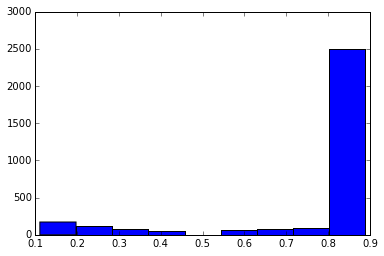

In [76]:
plt.hist(non_unanimous_votes, bins = 9)